In [271]:
import urllib, json
from urllib.request import urlopen
import numpy as np
from io import open
import ast
import time
import requests
import pandas as pd

from IPython.core.display import HTML,display
display(HTML("<style>.container { width:85% !important; }</style>"))

%matplotlib inline

import matplotlib

import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'


/var/folders/8c/zs0tty8n5j586jp3yx1lpdz00000gn/T/ipykernel_35576/2131126119.py:10: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML,display


In [3]:
fields = pd.read_excel("arrs_klasifikacija.xlsx",sheet_name="področja",header=None,dtype=str)
#kys = ('employs','cit','classificationFrascati','evaluation',"programs")
kys = ('employs','cit','classificationFrascati','evaluation')
vede = pd.read_excel("arrs_klasifikacija.xlsx",sheet_name="vede",header=None,dtype=str)

In [4]:
res = np.load("sicris_researchers_april_2025.npy",allow_pickle=True)

In [ ]:
#### TEST ####

In [55]:
count = 0
all = 0
c_um = 0
c_ul = 0
for i in res:
    all += 1
    if i["employs"]:
        if "Univerza v Mariboru" in i["employs"][0]["orgName"]:
            c_um += 1
            if i["mstid"] == "15413":
                print(all-1,i["mstid"],i["fullName"])
                test = i
        if "Univerza v Ljubljani" in i["employs"][0]["orgName"]:
            c_ul += 1
        count += 1
print(count,all,c_um,c_ul)

8018 15413 dr. Dean Korošak
11822 20700 1107 3556


In [ ]:
#### COUNT ####

In [164]:
count = 0
all = 0
c_um = 0
c_ul = 0
c_uni = 0
res_uni = []
res_um = []
res_ul = []
for i in res:
    all += 1
    if i["employs"] and i["classificationFrascati"]:
        um = False
        ul = False
        uni = False
        for e in i["employs"]:
            if "Univerza v Mariboru" in e["orgName"]:
                c_um += 1
                um = True
            if "Univerza v Ljubljani" in e["orgName"]:
                c_ul += 1
                ul = True
            if "Univerza" in e["orgName"]:
                c_uni += 1
                uni = True
            count += 1
        if um:
            res_um.append(i)
        if ul:
            res_ul.append(i)
        if uni:
            res_uni.append(i)
print("UM",len(res_um))
print("UL",len(res_ul))
print("UN",len(res_uni))
print(count,all,c_um,c_ul,c_uni)

UM 1195
UL 3840
UN 5657
13022 20700 1278 3911 5940


In [ ]:
#### CHECK RECORD ####

In [58]:
test["employs"]

[{'frame': 'MST',
  'id': 2093,
  'stat': 'A ',
  'statadm': 'UPD',
  'statdate': '2011-12-05T06:02:00',
  'type': 'GRP',
  'code': '0797-002',
  'employttl': 36,
  'empltype': 'FT',
  'enddate': '9999-12-31',
  'name': 'Raziskovalna skupina za aplikativno naravoslovje',
  'notAllowed': False,
  'orgCode': '0797',
  'orgName': 'Univerza v Mariboru, Fakulteta za gradbeništvo, prometno inženirstvo in arhitekturo',
  'orgid': 700,
  'position': 'Redni profesor',
  'resaercherFullName': '',
  'researchload': 0.0,
  'rolecode': 'RSL',
  'rolegroup': 'RSR',
  'rsrload': 100.0,
  'rsrttlby': 'Senat UM',
  'rsrttldate': '2011-10-18',
  'startdate': '1994-11-11'},
 {'frame': 'MST',
  'id': 3104,
  'stat': 'A ',
  'statadm': 'UPD',
  'statdate': '2017-02-24T09:25:00',
  'type': 'GRP',
  'code': '2334-003',
  'employttl': 36,
  'empltype': 'FT',
  'enddate': '9999-12-31',
  'name': 'Inštitut za fiziologijo',
  'notAllowed': False,
  'orgCode': '2334',
  'orgName': 'Univerza v Mariboru, Medicinska

In [63]:
test.keys()

dict_keys(['accessMapWithIconData', 'accessRights', 'allow', 'audiovisualSources', 'biblioRepresent', 'cit', 'classificationCerif', 'classificationFord', 'classificationFrascati', 'contact', 'educations', 'employs', 'evaluation', 'firstName', 'frame', 'fullName', 'hasTender', 'id', 'internacionalprojects', 'isLeader', 'keywords', 'langSkills', 'lastName', 'mstid', 'previousEmployments', 'programmesAndProjectsResults', 'programs', 'projects', 'researcher', 'rolecode', 'rsrttl', 'sex', 'stat', 'statadm', 'statdate', 'title', 'type', 'yngResearchers'])

In [68]:
test['classificationFrascati']

[{'field': '02',
  'fieldDescr': 'Fizika',
  'science': 1,
  'scienceDescr': 'Naravoslovje',
  'subfield': '01',
  'subfieldDescr': 'Fizika kondenzirane materije',
  'weight': 1,
  'sraId': {'id': 8798, 'weight': 1}},
 {'field': '07',
  'fieldDescr': 'Metabolne in hormonske motnje',
  'science': 3,
  'scienceDescr': 'Medicina',
  'subfield': '00',
  'weight': 2,
  'sraId': {'id': 8798, 'weight': 2}}]

In [78]:
str(test['classificationFrascati'][0]['science']) + "." + test['classificationFrascati'][0]['field']

'1.02'

In [88]:
fields[fields[0] == "1.04"]

,0,1
3,1.04,Kemija


In [ ]:
#### GET SICRIS DATA ####
##### COMPARISON WITH NATIONAL AVERAGE ####

In [156]:
podrocja_a12= {}
podrocja_ci10= {}
podrocja_a3 = {}
for r in res:
    if r["employs"]:
        if r["classificationFrascati"]:
            for p in r["classificationFrascati"]:
                f = str(p['science']) + "." + str(p['field'])
                if f in podrocja_a12:
                    #podrocja[f] += 1
                    podrocja_a12[f].append(r["evaluation"]["a12"])
                if f in podrocja_ci10:
                    podrocja_ci10[f].append(r["evaluation"]["ci10"])
                if f in podrocja_a3:
                    podrocja_a3[f].append(r["evaluation"]["a3score"])   
                else:
                    #podrocja[f] = 1
                    podrocja_a12[f] = [r["evaluation"]["a12"]]
                    podrocja_ci10[f] = [r["evaluation"]["ci10"]]
                    podrocja_a3[f] = [r["evaluation"]["a3score"]]

podrocja_a12_um= {}
podrocja_ci10_um= {}
podrocja_a3_um = {}
for r in res:
    um = False
    if r["employs"]:
        for e in r["employs"]:
            if "Univerza v Mariboru" in e["orgName"]:
                um = True
        if um:
            if r["classificationFrascati"]:
                for p in r["classificationFrascati"]:
                    f = str(p['science']) + "." + str(p['field'])
                    if f in podrocja_a12_um:
                        #podrocja[f] += 1
                        podrocja_a12_um[f].append(r["evaluation"]["a12"])
                    if f in podrocja_ci10_um:
                        podrocja_ci10_um[f].append(r["evaluation"]["ci10"])
                    if f in podrocja_a3_um:
                        podrocja_a3_um[f].append(r["evaluation"]["a3score"])   
                    else:
                        #podrocja[f] = 1
                        podrocja_a12_um[f] = [r["evaluation"]["a12"]]
                        podrocja_ci10_um[f] = [r["evaluation"]["ci10"]]
                        podrocja_a3_um[f] = [r["evaluation"]["a3score"]]    

In [163]:
f = '3.07'
print(f, np.mean(podrocja_a12[f]), np.mean(podrocja_a12_um[f]))
print(f, np.mean(podrocja_ci10[f]), np.mean(podrocja_ci10_um[f]))
print(f, np.median(podrocja_ci10[f]), np.median(podrocja_ci10_um[f]))
print(f, np.mean(podrocja_a3[f]), np.mean(podrocja_a3_um[f]))

3.07 140.70624277456648 187.24947368421053
3.07 662.9248554913295 788.6315789473684
3.07 138.0 384.0
3.07 0.11988439306358382 0.21631578947368424


In [165]:
#### COMPARISON WITH UL ####
podrocja_a12_ul= {}
podrocja_ci10_ul= {}
podrocja_a3_ul = {}
for r in res:
    ul = False
    if r["employs"]:
        for e in r["employs"]:
            if "Univerza v Ljubljani" in e["orgName"]:
                ul = True
        if ul:
            if r["classificationFrascati"]:
                for p in r["classificationFrascati"]:
                    f = str(p['science']) + "." + str(p['field'])
                    if f in podrocja_a12_ul:
                        #podrocja[f] += 1
                        podrocja_a12_ul[f].append(r["evaluation"]["a12"])
                    if f in podrocja_ci10_ul:
                        podrocja_ci10_ul[f].append(r["evaluation"]["ci10"])
                    if f in podrocja_a3_ul:
                        podrocja_a3_ul[f].append(r["evaluation"]["a3score"])   
                    else:
                        #podrocja[f] = 1
                        podrocja_a12_ul[f] = [r["evaluation"]["a12"]]
                        podrocja_ci10_ul[f] = [r["evaluation"]["ci10"]]
                        podrocja_a3_ul[f] = [r["evaluation"]["a3score"]]

In [253]:
podrocja_a12_up= {}
podrocja_ci10_up={}
podrocja_a3_up = {}
for r in res:
    up = False
    if r["employs"]:
        for e in r["employs"]:
            if "Univerza na Primorskem" in e["orgName"]:
                up = True
        if up:
            if r["classificationFrascati"]:
                for p in r["classificationFrascati"]:
                    f = str(p['science']) + "." + str(p['field'])
                    if f in podrocja_a12_up:
                        #podrocja[f] += 1
                        podrocja_a12_up[f].append(r["evaluation"]["a12"])
                    if f in podrocja_ci10_up:
                        podrocja_ci10_up[f].append(r["evaluation"]["ci10"])
                    if f in podrocja_a3_up:
                        podrocja_a3_up[f].append(r["evaluation"]["a3score"])   
                    else:
                        #podrocja[f] = 1
                        podrocja_a12_up[f] = [r["evaluation"]["a12"]]
                        podrocja_ci10_up[f] = [r["evaluation"]["ci10"]]
                        podrocja_a3_up[f] = [r["evaluation"]["a3score"]]

In [231]:
podrocja_a12_ijs = {}
podrocja_ci10_ijs={}
podrocja_a3_ijs = {}
for r in res:
    ijs = False
    if r["employs"]:
        for e in r["employs"]:
            if 'Institut "Jožef Stefan"' in e["orgName"]:
                ijs = True
        if ijs:
            if r["classificationFrascati"]:
                for p in r["classificationFrascati"]:
                    f = str(p['science']) + "." + str(p['field'])
                    if f in podrocja_a12_ijs:
                        #podrocja[f] += 1
                        podrocja_a12_ijs[f].append(r["evaluation"]["a12"])
                    if f in podrocja_ci10_ijs:
                        podrocja_ci10_ijs[f].append(r["evaluation"]["ci10"])
                    if f in podrocja_a3_ijs:
                        podrocja_a3_ijs[f].append(r["evaluation"]["a3score"])   
                    else:
                        #podrocja[f] = 1
                        podrocja_a12_ijs[f] = [r["evaluation"]["a12"]]
                        podrocja_ci10_ijs[f] = [r["evaluation"]["ci10"]]
                        podrocja_a3_ijs[f] = [r["evaluation"]["a3score"]]


In [171]:
f = '2.01'
print(f, np.mean(podrocja_a12[f]), np.mean(podrocja_a12_ul[f]), np.mean(podrocja_a12_um[f]))
print(f, np.mean(podrocja_ci10[f]), np.mean(podrocja_ci10_ul[f]), np.mean(podrocja_ci10_um[f]))
print(f, np.median(podrocja_ci10[f]), np.median(podrocja_ci10_ul[f]), np.median(podrocja_ci10_um[f]))
print(f, np.mean(podrocja_a3[f]), np.mean(podrocja_a3_ul[f]), np.mean(podrocja_a3_um[f]))

2.01 117.54542465753426 196.1963333333333 192.97697674418606
2.01 206.2027397260274 336.5888888888889 187.69767441860466
2.01 62.0 190.0 134.0
2.01 0.39052054794520547 0.45155555555555554 0.26372093023255816


In [233]:
##### SCIENCES ####
science_a12 = {}
science_ci10 = {}
science_a3 = {}
for r in res:
    if r["employs"]:
        if r["classificationFrascati"]:
            for p in r["classificationFrascati"]:
                f = str(p['science'])
                if f in science_a12:
                    #podrocja[f] += 1
                    science_a12[f].append(r["evaluation"]["a12"])
                if f in science_ci10:
                    science_ci10[f].append(r["evaluation"]["ci10"])
                if f in science_a3:
                    science_a3[f].append(r["evaluation"]["a3score"])   
                else:
                    #podrocja[f] = 1
                    science_a12[f] = [r["evaluation"]["a12"]]
                    science_ci10[f] = [r["evaluation"]["ci10"]]
                    science_a3[f] = [r["evaluation"]["a3score"]]

science_a12_um = {}
science_ci10_um = {}
science_a3_um = {}
for r in res:
    um = False
    if r["employs"]:
        for e in r["employs"]:
            if "Univerza v Mariboru" in e["orgName"]:
                um = True
        if um:
            if r["classificationFrascati"]:
                for p in r["classificationFrascati"]:
                    f = str(p['science'])
                    if f in science_a12_um:
                        #podrocja[f] += 1
                        science_a12_um[f].append(r["evaluation"]["a12"])
                    if f in science_ci10_um:
                        science_ci10_um[f].append(r["evaluation"]["ci10"])
                    if f in science_a3_um:
                        science_a3_um[f].append(r["evaluation"]["a3score"])   
                    else:
                        #podrocja[f] = 1
                        science_a12_um[f] = [r["evaluation"]["a12"]]
                        science_ci10_um[f] = [r["evaluation"]["ci10"]]
                        science_a3_um[f] = [r["evaluation"]["a3score"]]

science_a12_ul = {}
science_ci10_ul = {}
science_a3_ul = {}
for r in res:
    ul = False
    if r["employs"]:
        for e in r["employs"]:
            if "Univerza v Ljubljani" in e["orgName"]:
                ul = True
        if ul:
            if r["classificationFrascati"]:
                for p in r["classificationFrascati"]:
                    f = str(p['science'])
                    if f in science_a12_ul:
                        #podrocja[f] += 1
                        science_a12_ul[f].append(r["evaluation"]["a12"])
                    if f in science_ci10_ul:
                        science_ci10_ul[f].append(r["evaluation"]["ci10"])
                    if f in science_a3_ul:
                        science_a3_ul[f].append(r["evaluation"]["a3score"])   
                    else:
                        #podrocja[f] = 1
                        science_a12_ul[f] = [r["evaluation"]["a12"]]
                        science_ci10_ul[f] = [r["evaluation"]["ci10"]]
                        science_a3_ul[f] = [r["evaluation"]["a3score"]]

science_a12_up = {}
science_ci10_up = {}
science_a3_up = {}
for r in res:
    up = False
    if r["employs"]:
        for e in r["employs"]:
            if "Univerza na Primorskem" in e["orgName"]:
                up = True
        if up:
            if r["classificationFrascati"]:
                for p in r["classificationFrascati"]:
                    f = str(p['science'])
                    if f in science_a12_up:
                        #podrocja[f] += 1
                        science_a12_up[f].append(r["evaluation"]["a12"])
                    if f in science_ci10_up:
                        science_ci10_up[f].append(r["evaluation"]["ci10"])
                    if f in science_a3_up:
                        science_a3_up[f].append(r["evaluation"]["a3score"])   
                    else:
                        #podrocja[f] = 1
                        science_a12_up[f] = [r["evaluation"]["a12"]]
                        science_ci10_up[f] = [r["evaluation"]["ci10"]]
                        science_a3_up[f] = [r["evaluation"]["a3score"]]

science_a12_ijs = {}
science_ci10_ijs = {}
science_a3_ijs = {}
for r in res:
    ijs = False
    if r["employs"]:
        for e in r["employs"]:
            if 'Institut "Jožef Stefan"' in e["orgName"]:
                ijs = True
        if ijs:
            if r["classificationFrascati"]:
                for p in r["classificationFrascati"]:
                    f = str(p['science'])
                    if f in science_a12_ijs:
                        #podrocja[f] += 1
                        science_a12_ijs[f].append(r["evaluation"]["a12"])
                    if f in science_ci10_ijs:
                        science_ci10_ijs[f].append(r["evaluation"]["ci10"])
                    if f in science_a3_ijs:
                        science_a3_ijs[f].append(r["evaluation"]["a3score"])   
                    else:
                        #podrocja[f] = 1
                        science_a12_ijs[f] = [r["evaluation"]["a12"]]
                        science_ci10_ijs[f] = [r["evaluation"]["ci10"]]
                        science_a3_ijs[f] = [r["evaluation"]["a3score"]]

    

In [178]:
s = '6'
print(s, np.mean(science_a12[s]), np.mean(science_a12_ul[s]), np.mean(science_a12_um[s]))
print(s, np.mean(science_ci10[s]), np.mean(science_ci10_ul[s]), np.mean(science_ci10_um[s]))
print(s, np.median(science_ci10[s]), np.median(science_ci10_ul[s]), np.median(science_ci10_um[s]))
print(s, np.mean(science_a3[s]), np.mean(science_a3_ul[s]), np.mean(science_a3_um[s]))

6 322.1427608069164 345.1082872928177 418.1028275862069
6 35.94236311239193 28.66988950276243 41.16551724137931
6 6.0 6.0 12.0
6 0.11140057636887607 0.09555248618784531 0.10524137931034482


In [185]:
s = '3'
f = '3.02'
print(s, np.mean(science_a12_ul[s])/np.mean(science_a12[s]), np.mean(science_a12_um[s])/np.mean(science_a12[s]))
print(f, np.mean(podrocja_a12_ul[f])/np.mean(podrocja_a12[f]), np.mean(podrocja_a12_um[f])/np.mean(podrocja_a12[f]))
print(s, np.mean(science_ci10_ul[s])/np.mean(science_ci10[s]), np.mean(science_ci10_um[s])/np.mean(science_ci10[s]))
print(f, np.mean(podrocja_ci10_ul[f])/np.mean(podrocja_ci10[f]), np.mean(podrocja_ci10_um[f])/np.mean(podrocja_ci10[f]))
print(s, np.median(science_ci10_ul[s])/np.median(science_ci10[s]), np.median(science_ci10_um[s])/np.median(science_ci10[s]))
print(f, np.median(podrocja_ci10_ul[f])/np.median(podrocja_ci10[f]), np.median(podrocja_ci10_um[f])/np.median(podrocja_ci10[f]))
print(s, np.mean(science_a3_ul[s])/np.mean(science_a3[s]), np.mean(science_a3_um[s])/np.mean(science_a3[s]))
print(f, np.mean(podrocja_a3_ul[f])/np.mean(podrocja_a3[f]), np.mean(podrocja_a3_um[f])/np.mean(podrocja_a3[f]))

3 1.7758478660270562 1.9594485224285174
3.02 1.2047869197111927 1.624048269189618
3 1.8531036625759874 1.2662925151471507
3.02 1.2896304770961176 0.05277625068719076
3 3.1032608695652173 3.0760869565217392
3.02 1.2115384615384615 0.15384615384615385
3 1.0171166350890488 3.212577796800074
3.02 1.5774828082520387 0.0


In [258]:
s = '2'
q1 = np.mean(science_a12_um[s])/np.mean(science_a12[s])
q2 = np.mean(science_ci10_um[s])/np.mean(science_ci10[s])
q3 = np.mean(science_a3_um[s])/np.mean(science_a3[s])
q4 = np.median(science_ci10_um[s])/np.median(science_ci10[s])
print(s, (q1*q2*q3)**(1/3), (q1*q3*q4)**(1/3), q1, q2, q3, q4)
q1 = np.mean(science_a12_ul[s])/np.mean(science_a12[s])
q2 = np.mean(science_ci10_ul[s])/np.mean(science_ci10[s])
q3 = np.mean(science_a3_ul[s])/np.mean(science_a3[s])
q4 = np.median(science_ci10_ul[s])/np.median(science_ci10[s])
print(s, (q1*q2*q3)**(1/3), (q1*q3*q4)**(1/3), q1, q2, q3, q4)
q1 = np.mean(science_a12_up[s])/np.mean(science_a12[s])
q2 = np.mean(science_ci10_up[s])/np.mean(science_ci10[s])
q3 = np.mean(science_a3_up[s])/np.mean(science_a3[s])
q4 = np.median(science_ci10_up[s])/np.median(science_ci10[s])
print(s, (q1*q2*q3)**(1/3), (q1*q3*q4)**(1/3), q1, q2, q3, q4)
q1 = np.mean(science_a12_ijs[s])/np.mean(science_a12[s])
q2 = np.mean(science_ci10_ijs[s])/np.mean(science_ci10[s])
q3 = np.mean(science_a3_ijs[s])/np.mean(science_a3[s])
q4 = np.median(science_ci10_ijs[s])/np.median(science_ci10[s])
print(s, (q1*q2*q3)**(1/3), (q1*q3*q4)**(1/3), q1, q2, q3, q4)

2 1.382315905440333 1.6677685530992743 1.5404716891524395 1.2431817295734002 1.379220092926261 2.183333333333333
2 1.4522546680847235 1.7383302518753008 1.3968983360593594 1.3994027420240183 1.5668261918648518 2.4
2 1.420148629007644 1.9788048941342877 1.7196032541308444 1.0935523448615445 1.5231180406314495 2.9583333333333335
2 1.7833336992720916 1.9398941394340745 1.741050583527832 2.045830235568621 1.592270567416785 2.6333333333333333


In [262]:
f = '3.07'
q1 = np.mean(podrocja_a12_um[f])/np.mean(podrocja_a12[f])
q2 = np.mean(podrocja_ci10_um[f])/np.mean(podrocja_ci10[f])
q3 = np.mean(podrocja_a3_um[f])/np.mean(podrocja_a3[f])
q4 = np.median(podrocja_ci10_um[f])/np.median(podrocja_ci10[f])
print(f, (q1*q2*q3)**(1/3), (q1*q3*q4)**(1/3), q1, q2, q3, q4)
q1 = np.mean(podrocja_a12_ul[f])/np.mean(podrocja_a12[f])
q2 = np.mean(podrocja_ci10_ul[f])/np.mean(podrocja_ci10[f])
q3 = np.mean(podrocja_a3_ul[f])/np.mean(podrocja_a3[f])
q4 = np.median(podrocja_ci10_ul[f])/np.median(podrocja_ci10[f])
print(f, (q1*q2*q3)**(1/3), (q1*q3*q4)**(1/3), q1, q2, q3, q4)
q1 = np.mean(podrocja_a12_up[f])/np.mean(podrocja_a12[f])
q2 = np.mean(podrocja_ci10_up[f])/np.mean(podrocja_ci10[f])
q3 = np.mean(podrocja_a3_up[f])/np.mean(podrocja_a3[f])
q4 = np.median(podrocja_ci10_up[f])/np.median(podrocja_ci10[f])
print(f, (q1*q2*q3)**(1/3), (q1*q3*q4)**(1/3), q1, q2, q3, q4)
q1 = np.mean(podrocja_a12_ijs[f])/np.mean(podrocja_a12[f])
q2 = np.mean(podrocja_ci10_ijs[f])/np.mean(podrocja_ci10[f])
q3 = np.mean(podrocja_a3_ijs[f])/np.mean(podrocja_a3[f])
q4 = np.median(podrocja_ci10_ijs[f])/np.median(podrocja_ci10[f])
print(f, (q1*q2*q3)**(1/3), (q1*q3*q4)**(1/3), q1, q2, q3, q4)

3.07 1.4188861756611466 1.8834827617287033 1.330782984406837 1.1896243931944155 1.8043698929097092 2.782608695652174
3.07 2.7694893715060585 3.661904503296049 2.480330603093067 2.880809165896448 2.972864030858245 6.659420289855072
3.07 0.6659079971735011 1.0162586924725419 1.2997148981726367 0.6809218213208238 0.33365477338476374 2.420289855072464


KeyError: '3.07'

In [395]:
a12_um_fields = []
ci10_um_fields = []
a3_um_fields = []
median_ci10_um_fields = []

a12_ul_fields = []
ci10_ul_fields = []
a3_ul_fields = []
median_ci10_ul_fields = []

a12_up_fields = []
ci10_up_fields = []
a3_up_fields = []
median_ci10_up_fields = []

a12_ijs_fields = []
ci10_ijs_fields = []
a3_ijs_fields = []
median_ci10_ijs_fields = []

min_records = 15

for f in fields[0]:
    if f in podrocja_a12_um and f in podrocja_ci10_um and f in podrocja_a3_um:
        if len(podrocja_a12_um[f]) > min_records:
            q1 = np.mean(podrocja_a12_um[f])/np.mean(podrocja_a12[f])
            a12_um_fields.append(q1)
            q2 = np.mean(podrocja_ci10_um[f])/np.mean(podrocja_ci10[f])
            ci10_um_fields.append(q2)
            q3 = np.mean(podrocja_a3_um[f])/np.mean(podrocja_a3[f])
            a3_um_fields.append(q3)
            #q4 = np.median(podrocja_ci10_um[f])/np.median(podrocja_ci10[f])
            #median_ci10_um_fields.append(q4)
            #print(f, q1, q2, q3)
    if f in podrocja_a12_ul and f in podrocja_ci10_ul and f in podrocja_a3_ul:
        if len(podrocja_a12_ul[f]) > min_records:
            q1 = np.mean(podrocja_a12_ul[f])/np.mean(podrocja_a12[f])
            a12_ul_fields.append(q1)
            q2 = np.mean(podrocja_ci10_ul[f])/np.mean(podrocja_ci10[f])
            ci10_ul_fields.append(q2)
            q3 = np.mean(podrocja_a3_ul[f])/np.mean(podrocja_a3[f])
            a3_ul_fields.append(q3)
            #q4 = np.median(podrocja_ci10_ul[f])/np.median(podrocja_ci10[f])
            #median_ci10_ul_fields.append(q4)
            #print(f, q1, q2, q3)

    if f in podrocja_a12_up and f in podrocja_ci10_up and f in podrocja_a3_up:
        if len(podrocja_a12_up[f]) > min_records:
            q1 = np.mean(podrocja_a12_up[f])/np.mean(podrocja_a12[f])
            a12_up_fields.append(q1)
            q2 = np.mean(podrocja_ci10_up[f])/np.mean(podrocja_ci10[f])
            ci10_up_fields.append(q2)
            q3 = np.mean(podrocja_a3_up[f])/np.mean(podrocja_a3[f])
            a3_up_fields.append(q3)
            #q4 = np.median(podrocja_ci10_up[f])/np.median(podrocja_ci10[f])
            #median_ci10_up_fields.append(q4)
            #print(f, q1, q2, q3)
    
    if f in podrocja_a12_ijs and f in podrocja_ci10_ijs and f in podrocja_a3_ijs:
        if len(podrocja_a12_ijs[f]) > min_records:
            q1 = np.mean(podrocja_a12_ijs[f])/np.mean(podrocja_a12[f])
            a12_ijs_fields.append(q1)
            q2 = np.mean(podrocja_ci10_ijs[f])/np.mean(podrocja_ci10[f])
            ci10_ijs_fields.append(q2)
            q3 = np.mean(podrocja_a3_ijs[f])/np.mean(podrocja_a3[f])
            a3_ijs_fields.append(q3)
            #q4 = np.median(podrocja_ci10_ijs[f])/np.median(podrocja_ci10[f])
            #median_ci10_ijs_fields.append(q4)
            #print(f, q1, q2, q3)
    


<Axes: ylabel='Density'>

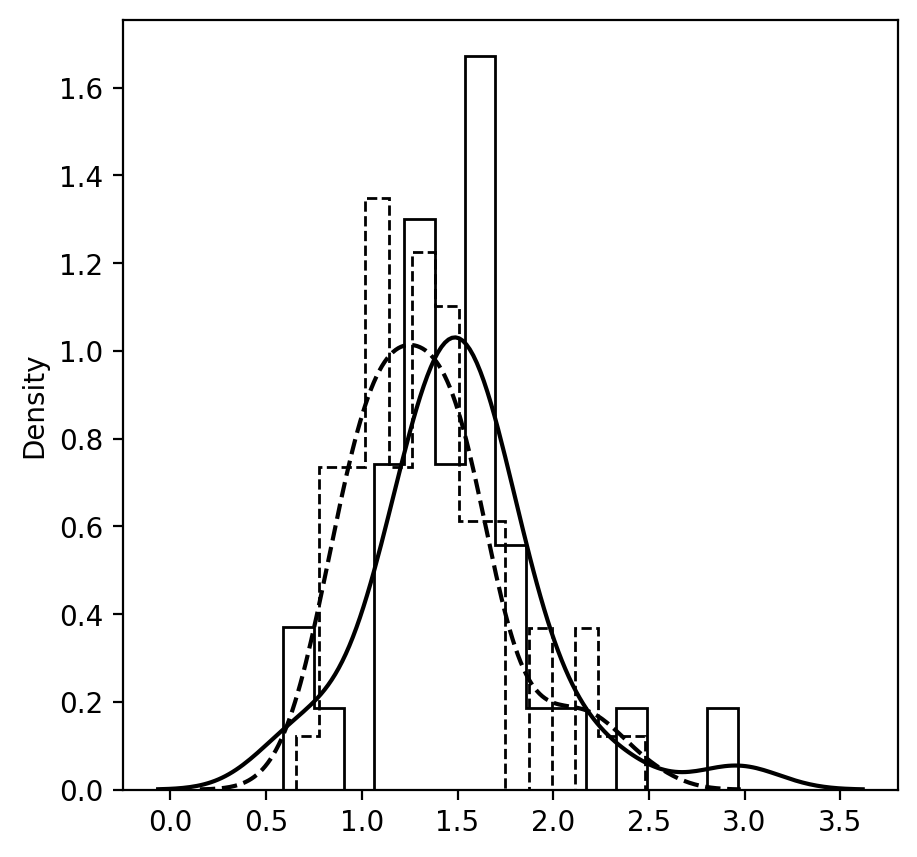

In [396]:
# plot a12_um_fields histogram
plt.figure(figsize=(5, 5))
plt.hist(a12_ul_fields, bins=15, color='black', histtype='step',linestyle='--',density=True)
# linestyle dashed
plt.hist(a12_um_fields, bins=15, color='black', histtype='step', density=True)
# fit distribution with gaussian
from scipy.stats import norm
import seaborn as sns
sns.kdeplot(a12_um_fields, color='black', label='UM')
sns.kdeplot(a12_ul_fields, color='black', label='UL', linestyle='--')

Text(0, 0.5, '$pdf(q)$')

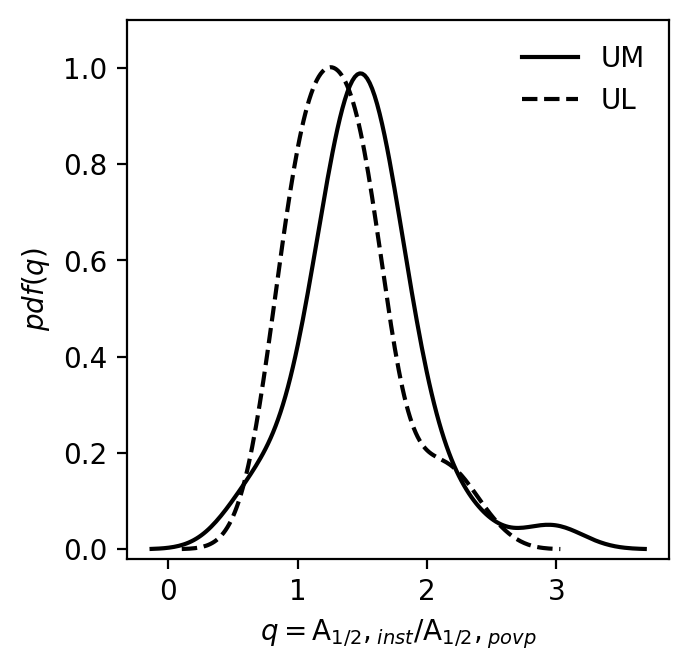

In [456]:
plt.figure(figsize=(3.5, 3.5))
sns.kdeplot(a12_um_fields, color='black', label='UM', bw_adjust=1.1)
sns.kdeplot(a12_ul_fields, color='black', label='UL', linestyle='--', bw_adjust=1.1)
#sns.kdeplot(a12_up_fields, color='black', label='UP', linestyle=':', bw_adjust=.8)
#sns.kdeplot(a12_ijs_fields, color='black', label='IJS', linestyle='-.', bw_adjust=.8)
plt.ylim(-0.02, 1.1)
# legend no frame
plt.legend(frameon=False)
#plt.legend()
plt.xlabel(r'$q=\mathrm{A_{1/2},}_{inst}/\mathrm{A_{1/2},}_{povp}$')
plt.ylabel(r'$pdf(q)$')

Text(0, 0.5, '$pdf(q)$')

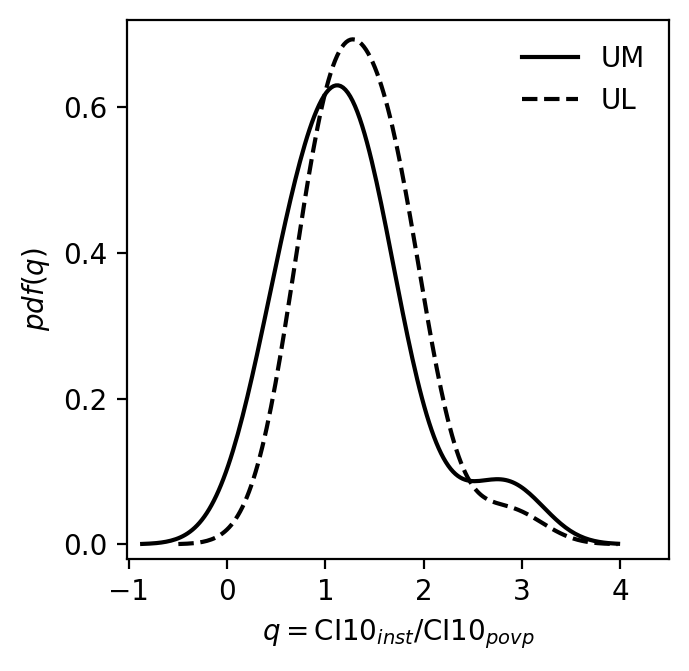

In [451]:
plt.figure(figsize=(3.5, 3.5))
sns.kdeplot(ci10_um_fields, color='black', label='UM', bw_adjust=1.1)
sns.kdeplot(ci10_ul_fields, color='black', label='UL', linestyle='--', bw_adjust=1.5)
#sns.kdeplot(ci10_up_fields, color='black', label='UM', linestyle=':', bw_adjust=1.)
#sns.kdeplot(ci10_ijs_fields, color='black', label='UM', linestyle='-.', bw_adjust=1.)
plt.yticks(np.arange(0, 1, 0.2));
plt.ylim(-0.02, .72)
plt.xlim(-1.02, 4.5)
plt.legend(frameon=False)
plt.xlabel(r'$q=\mathrm{CI}10_{inst}/\mathrm{CI}10_{povp}$')
plt.ylabel(r'$pdf(q)$')

Text(0, 0.5, '$pdf(q)$')

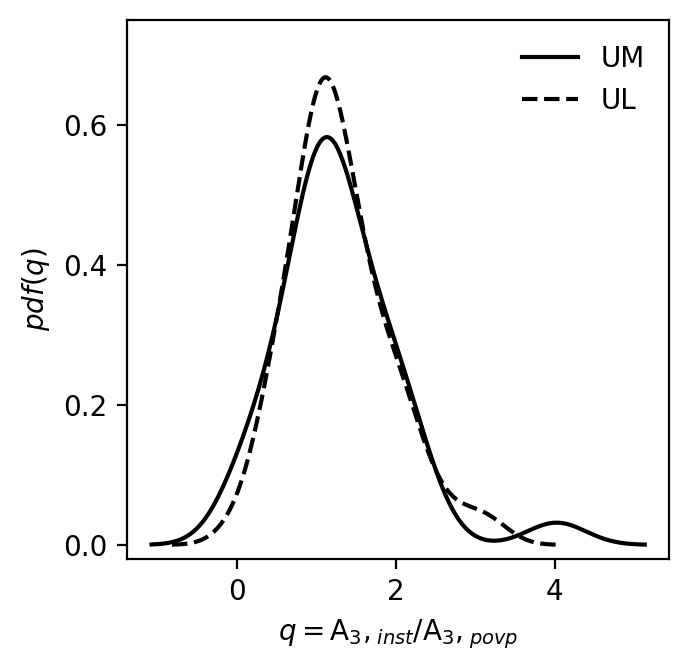

In [459]:
plt.figure(figsize=(3.5, 3.5))
sns.kdeplot(a3_um_fields, color='black', label='UM')
sns.kdeplot(a3_ul_fields, color='black', label='UL', linestyle='--')
#sns.kdeplot(a3_up_fields, color='black', label='UP', linestyle=':')
#sns.kdeplot(a3_ijs_fields, color='black', label='IJS', linestyle='-.')
#plt.xlim(0-1.2, 6.)
# y tick marks 0.0, 0.2, 0.4, 0.6, 0.8
#plt.xticks(np.arange(0, 6, 1))
plt.yticks(np.arange(0, 1, 0.2));
plt.ylim(-0.02, 0.75)
plt.legend(frameon=False)
plt.xlabel(r'$q=\mathrm{A_3,}_{inst}/\mathrm{A_3,}_{povp}$')
plt.ylabel(r'$pdf(q)$')


(0.0, 1.15)

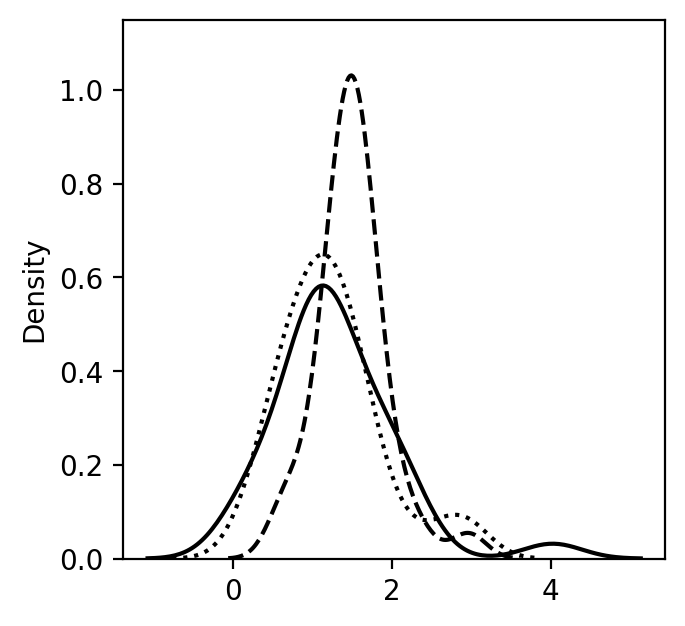

In [404]:
plt.figure(figsize=(3.5, 3.5))
sns.kdeplot(a3_um_fields, color='black', label='UM', bw_adjust=1.)
sns.kdeplot(a12_um_fields, color='black', label='UL', linestyle='--', bw_adjust=1.)
sns.kdeplot(ci10_um_fields, color='black', label='UP', linestyle=':', bw_adjust=1.)
plt.ylim(0, 1.15)

In [285]:
for f in fields[0]:
    if f in podrocja_a12_um and f in podrocja_ci10_um and f in podrocja_a3_um:
        print(f, len(podrocja_a12_um[f]), len(podrocja_ci10_um[f]), len(podrocja_a3_um[f]))


1.01 70 70 70
1.02 46 46 46
1.03 39 39 39
1.04 56 56 56
1.05 23 23 23
1.06 1 1 1
1.07 8 8 8
1.08 9 9 9
1.09 12 12 12
2.01 43 43 43
2.02 62 62 62
2.03 33 33 33
2.04 49 49 49
2.05 35 35 35
2.06 45 45 45
2.07 185 185 185
2.08 25 25 25
2.09 15 15 15
2.10 53 53 53
2.11 32 32 32
2.12 33 33 33
2.13 26 26 26
2.14 44 44 44
2.15 16 16 16
2.17 1 1 1
2.19 38 38 38
2.20 1 1 1
2.21 1 1 1
3.01 18 18 18
3.02 1 1 1
3.03 6 6 6
3.04 9 9 9
3.05 10 10 10
3.06 11 11 11
3.07 19 19 19
3.08 43 43 43
3.09 3 3 3
4.01 1 1 1
4.02 12 12 12
4.03 40 40 40
4.04 1 1 1
4.05 1 1 1
4.06 15 15 15
5.01 81 81 81
5.02 107 107 107
5.03 17 17 17
5.04 101 101 101
5.05 42 42 42
5.06 12 12 12
5.07 13 13 13
5.08 12 12 12
5.09 25 25 25
5.10 14 14 14
5.12 17 17 17
5.13 2 2 2
6.01 18 18 18
6.03 6 6 6
6.04 1 1 1
6.05 58 58 58
6.07 19 19 19
6.08 1 1 1
6.09 6 6 6
6.10 14 14 14
6.12 13 13 13


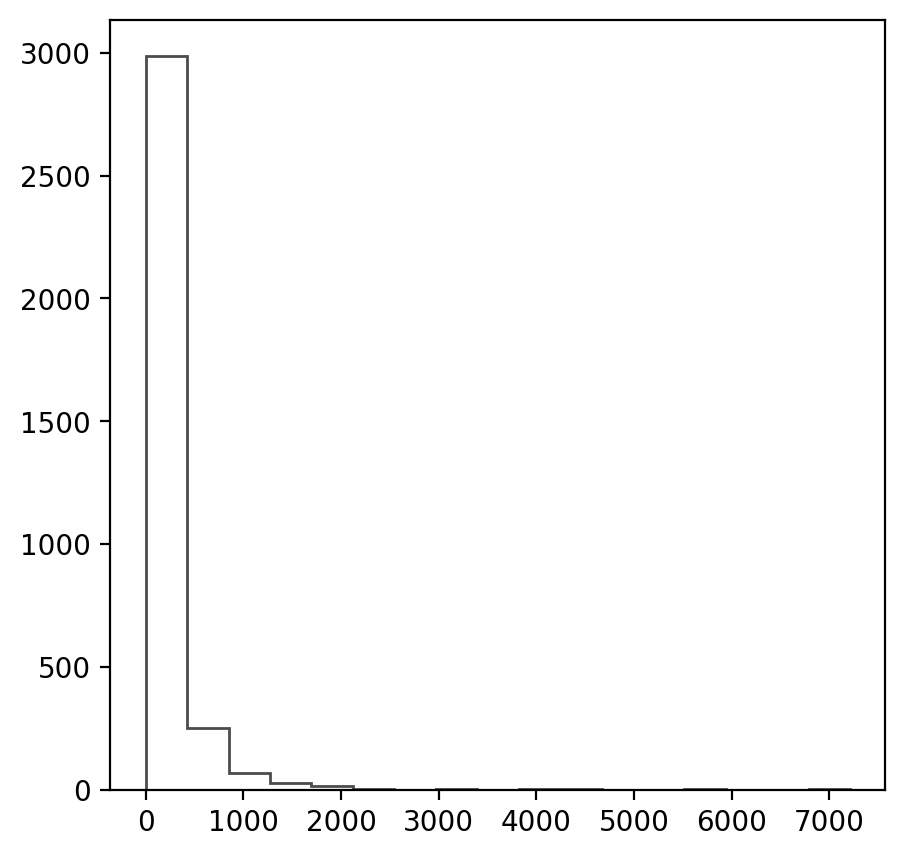

In [295]:
s = '1'
# plot science_a12_um[s] histogram
plt.figure(figsize=(5, 5))
plt.hist(science_a12[s], bins=17, color='blue', alpha=0.7, edgecolor='black', histtype='step');